In [ ]:
import pandas as pd

def clean_dataframe(df, threshold_ratio=0.75, columns_to_drop=None, sort_by=None):
    threshold = len(df) * threshold_ratio
    mask = df.apply(lambda col: ((col == 0) | (col.isna()) | (col == '')).sum() <= threshold, axis=0)
    df = df.loc[:, mask]

    if columns_to_drop:
        columns_to_drop = [col for col in columns_to_drop if col in df.columns]
        df = df.drop(columns=columns_to_drop)
    if sort_by:
        sort_by = [col for col in sort_by if col in df.columns]
        if sort_by:
            df = df.sort_values(by=sort_by)
    return df

columns_to_remove = ['1. YEAR', '2. TRIFD', '3. FRS ID', '5. STREET ADDRESS', '6. CITY', '7. COUNTY', '8. ST', '9. ZIP', '14. HORIZONTAL DATUM', '15. PARENT CO NAME', '16. PARENT CO DB NUM', '17. STANDARD PARENT CO NAME', '21. FEDERAL FACILITY', '23. INDUSTRY SECTOR', '30. PRIMARY NAICS', '36. DOC_CTRL_NUM', '37. CHEMICAL', '38. ELEMENTAL METAL INCLUDED', '39. TRI CHEMICAL/COMPOUND ID', '40. CAS#', '41. SRS ID', '42. CLEAN AIR ACT CHEMICAL', '43. CLASSIFICATION', '44. METAL', '45. METAL CATEGORY', '46. CARCINOGEN', '47. PBT', '48. PFAS', '49. FORM TYPE', '50. UNIT OF MEASURE', '51. 5.1 - FUGITIVE AIR', '52. 5.2 - STACK AIR', '110. 8.1B - ON-SITE OTHER', '122. 8.9 - PRODUCTION RATIO', '121. PROD_RATIO_OR_ ACTIVITY']
columns_to_sort = ['12. LATITUDE', '13. LONGITUDE']

In [ ]:
df2017 = pd.read_csv('/content/2017_us.csv')
df2017 = clean_dataframe(df2017, columns_to_drop=columns_to_remove, sort_by=columns_to_sort)

<ipython-input-19-24ff7b8a6cdb>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df2017 = pd.read_csv('/content/2017_us.csv')


In [ ]:
df2017

,4. FACILITY NAME,12. LATITUDE,13. LONGITUDE,22. INDUSTRY SECTOR CODE,65. ON-SITE RELEASE TOTAL,88. OFF-SITE RELEASE TOTAL,106. 6.2 - TOTAL TRANSFER,107. TOTAL RELEASES,119. PRODUCTION WSTE (8.1-8.7)
4502,STAR KIST SAMOA CO,-14.270919,-170.687692,311,0.200,0.0,0.0,0.200,0.200
53715,STAR KIST SAMOA CO,-14.270919,-170.687692,311,145.000,0.0,0.0,145.000,145.000
66134,STAR KIST SAMOA CO,-14.270919,-170.687692,311,56076.000,552.0,552.0,56628.000,56628.000
23459,TENJO VISTA POWER PLANT,13.416907,144.687034,2211,74.320,0.0,0.0,74.320,74.320
39339,TENJO VISTA POWER PLANT,13.416907,144.687034,2211,0.061,0.0,0.0,0.061,0.061
...,...,...,...,...,...,...,...,...,...
40742,NORTHERN OILFIELD SOLUTIONS LLC PRUDHOE BAY BU...,70.202079,-148.462577,4247,148.600,4.0,4.0,152.600,152.600
41370,NORTHERN OILFIELD SOLUTIONS LLC PRUDHOE BAY BU...,70.202079,-148.462577,4247,1.100,0.4,0.6,1.500,1.700
49910,NORTHERN OILFIELD SOLUTIONS LLC PRUDHOE BAY BU...,70.202079,-148.462577,4247,0.300,0.7,0.7,1.000,1.000
56976,NORTHERN OILFIELD SOLUTIONS LLC PRUDHOE BAY BU...,70.202079,-148.462577,4247,112.000,0.0,0.0,112.000,112.000


In [ ]:
grouped = df2017.groupby(['4. FACILITY NAME', '12. LATITUDE', '13. LONGITUDE', '22. INDUSTRY SECTOR CODE'])
summed_columns = grouped.sum()
summed_columns

65. ON-SITE RELEASE TOTAL  \
4. FACILITY NAME                 12. LATITUDE 13. LONGITUDE 22. INDUSTRY SECTOR CODE                              
1000PALMS VISTA CHINO PLANT      33.845320    -116.375570   327                                           0.000   
14095 WILLOW PARK                32.728030    -97.620201    327                                           0.011   
14096 - PROSPER                  33.229268    -96.821519    327                                           0.090   
14122 ABILENE 1                  32.471710    -99.777520    327                                           0.044   
1500 SOUTH TIBBS LLC             39.740281    -86.218331    325                                       36050.000   
...                                                                                                         ...   
ZSCHIMMER & SCHWARZ INTERPOLYMER 38.152222    -85.894444    325                                           3.900   
                                 42.157819    -71.115941    325                                           0.000   
ZURN WATER LLC                   33.005220    -96.229613    332                                           3.570   
                                 35.610249    -120.652365   332                                           0.000   
ZXP TECHNOLOGIES LLC             29.815270    -95.052500    325                                        1520.000   

                                                                                      88. OFF-SITE RELEASE TOTAL  \
4. FACILITY NAME                 12. LATITUDE 13. LONGITUDE 22. INDUSTRY SECTOR CODE                               
1000PALMS VISTA CHINO PLANT      33.845320    -116.375570   327                                              0.0   
14095 WILLOW PARK                32.728030    -97.620201    327                                              0.0   
14096 - PROSPER                  33.229268    -96.821519    327                                              0.0   
14122 ABILENE 1                  32.471710    -99.777520    327                                              0.0   
1500 SOUTH TIBBS LLC             39.740281    -86.218331    325                                          14073.7   
...                                                                                                          ...   
ZSCHIMMER & SCHWARZ INTERPOLYMER 38.152222    -85.894444    325                                              0.0   
                                 42.157819    -71.115941    325                                              0.0   
ZURN WATER LLC                   33.005220    -96.229613    332                                           1598.0   
                                 35.610249    -120.652365   332                                              0.0   
ZXP TECHNOLOGIES LLC             29.815270    -95.052500    325                                              0.0   

                                                                                      106. 6.2 - TOTAL TRANSFER  \
4. FACILITY NAME                 12. LATITUDE 13. LONGITUDE 22. INDUSTRY SECTOR CODE                              
1000PALMS VISTA CHINO PLANT      33.845320    -116.375570   327                                             0.0   
14095 WILLOW PARK                32.728030    -97.620201    327                                             0.0   
14096 - PROSPER                  33.229268    -96.821519    327                                             0.0   
14122 ABILENE 1                  32.471710    -99.777520    327                                             0.0   
1500 SOUTH TIBBS LLC             39.740281    -86.218331    325                                        169848.0   
...                                                                                                         ...   
ZSCHIMMER & SCHWARZ INTERPOLYMER 38.152222    -85.894444    325                                             0.0   
                                 42.157819    

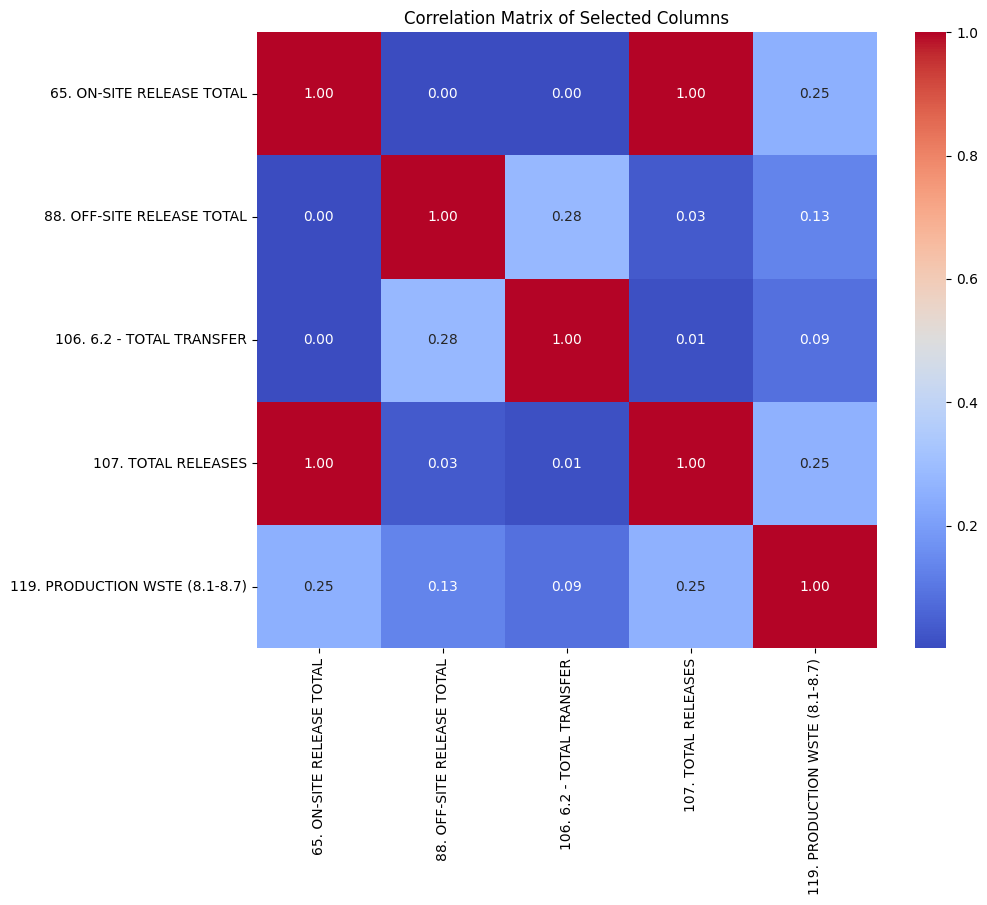

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the columns for correlation analysis
columns_for_correlation = [ '65. ON-SITE RELEASE TOTAL', '88. OFF-SITE RELEASE TOTAL', '106. 6.2 - TOTAL TRANSFER', '107. TOTAL RELEASES', '119. PRODUCTION WSTE (8.1-8.7)']

# Create the correlation matrix
correlation_matrix = summed_columns[columns_for_correlation].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Columns')
plt.show()
